# Word2Vec

# Collect Data

In [0]:
corpus = ['While there seems to be much evidence that perceptual states can occur without being conscious, some theorists recently express scepticism about unconscious perception',
'We explore here two kinds of such scepticism: Megan Peters and Hakwan Laus experimental work regarding the well-known problem of the criterion -which seems to show that many purported instances of unconscious perception go unreported but are weakly conscious -and Ian Phillips theoretical consideration, which he calls the problem of attribution -the worry that many purported examples of unconscious perception are not perceptual, but rather merely informational and subpersonal',
'We argue that these concerns do not undermine the evidence for unconscious perception and that this sceptical approach results in a dilemma for the sceptic, who must either deny that there is unconscious mentality generally or explain why perceptual states are unique in the mind such that they cannot occur unconsciously',
'Both options, we argue, are problematic']


# Remove stop words
In order for efficiency of creating word vector, we will remove commonly used words

In [0]:
#for text in corpus:
#  tmp = text.split(' ')
#  print(len(tmp))
#  print(tmp)

In [0]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        text = text.replace(',', '') # to remove commas
        text = text.replace('-', '') # to remove hyphens
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [28]:
corpus = remove_stop_words(corpus)
corpus

['While there seems to much evidence that perceptual states can occur without being conscious some theorists recently express scepticism about unconscious perception',
 'We explore here two kinds of such scepticism: Megan Peters and Hakwan Laus experimental work regarding the wellknown problem of the criterion which seems to show that many purported instances of unconscious perception go unreported but are weakly conscious and Ian Phillips theoretical consideration which he calls the problem of attribution the worry that many purported examples of unconscious perception are not perceptual but rather merely informational and subpersonal',
 'We argue that these concerns do not undermine the evidence for unconscious perception and that this sceptical approach results in dilemma for the sceptic who must either deny that there unconscious mentality generally or explain why perceptual states are unique in the mind such that they cannot occur unconsciously',
 'Both options we argue are proble

In [0]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)
        #print(words)

words = set(words) # unique words from corpus after removing stopped words
#words

here we have word set by which we will have word vector

In [0]:
words

# data generation
we will generate label for each word using skip gram.  

In [0]:
word2int = {}

for i, word in enumerate(words):
  #print(i, word)
  word2int[word] = i # give a numerical id for each word in the corpus

word2int

In [0]:
#sentences = []
#for sentence in corpus:
#    sentences.append(sentence.split())
#
##sentences
#for sentence in sentences:
#  for idx, word in enumerate(sentence):
#    #print(idx, word)
#    #print(sentence)

In [0]:
word2int = {}

for i, word in enumerate(words):
    word2int[word] = i # create a dictionary with unique numerical id for each word

sentences = []
for sentence in corpus:
    sentences.append(sentence.split()) # split each row of corpus into a list
    
WINDOW_SIZE = 2

data = []
for sentence in sentences: # get row by row
    for idx, word in enumerate(sentence): # note, each row is a sentence
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word: # use word to predict neighbor
                data.append([word, neighbor]) # setting up x and y for training

In [34]:
import pandas as pd
#for text in corpus:
#    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])
df

,input,label
0,While,there
1,While,seems
2,there,While
3,there,seems
4,there,to
...,...,...
555,are,we
556,are,argue
557,are,problematic
558,problematic,argue


In [0]:
#df.head(10)

In [36]:
df.shape

(560, 2)

In [0]:
#word2int

# Define Tensorflow Graph

In [0]:
#for x, y in zip(df['input'], df['label']):
#  print(x, y)

In [39]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words) # length corresponds to number of unique words

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

print(ONE_HOT_DIM)
X_train.shape # 52 x 12, where 12 equals the number of unique words

97


(560, 97)

In [0]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words) # length corresponds to number of unique words

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

# Train

In [41]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  5.83767
iteration 3000 loss is :  4.3654838
iteration 6000 loss is :  4.109534
iteration 9000 loss is :  3.9647138
iteration 12000 loss is :  3.8608978
iteration 15000 loss is :  3.7832274
iteration 18000 loss is :  3.7226422


In [0]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

# word vector in table

In [43]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,Laus,-0.357714,0.206662
1,unconscious,0.632209,0.616892
2,undermine,-0.990625,1.988827
3,subpersonal,-0.372422,0.624757
4,why,-0.498070,-1.970051
...,...,...,...
92,perception,1.069679,1.075555
93,which,-1.388269,1.295172
94,argue,-0.038998,-0.128594
95,problem,1.205391,2.363776


# word vector in 2d chart

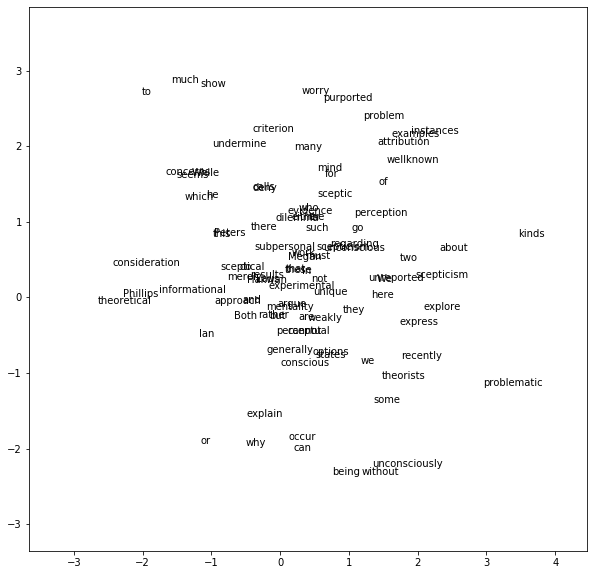

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()